# Preprocessing Data

Since it is a complicated survey data, I need to process the variables one by one. This is a national drug survey data that collected across Finland. Most of the questions are in check mark form. If participants agree on options, he/she just put a thick on it. Besides, the separation or aggregation of the questions requires a field expertise. I do not focus here so much on EDA because I mainly prepare data for further analysis. My aim on this project is to build models for polydrug use among risk groups, cannabis use among population and predicting cannabis use if it would be decriminalized. So, detail EDA statistis could be find on those pages. 

In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

pd.options.mode.chained_assignment = None  # default='warn'



In [2]:
df = pd.read_csv('thl.csv')
df.shape


/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (141,179,200,284) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(3485, 369)

In [3]:
df.dtypes.value_counts()

float64    324
int64       23
object      22
dtype: int64

As seen above, data has 369 variables and 3485 observations. Few of the variables in object form and the rest mainly in numbers. As mentioned above, even these variables are in binary format or ordered categories, such as likerd scale. 

# EDA and Preprocessing

Variable selection here is a design choice and I only focused on those that would be usefull for my models. 

In [4]:
# gender
df['k1'].value_counts(dropna=False)

2    1947
1    1538
Name: k1, dtype: int64

In [5]:
df['age'] = 2014 - df['k2']
df['age'].describe()

count    3485.000000
mean       40.867145
std        16.280050
min        15.000000
25%        27.000000
50%        38.000000
75%        56.000000
max        69.000000
Name: age, dtype: float64

In [6]:
#### age

#add a new column category next to the age group. 
df['age_bins'] = pd.cut(x=df['age'], bins=[14, 24, 34, 44, 54, 70])

 
# We can check the frequency of each bin
print(df['age_bins'].unique())

print('--------------- \n')
print(df['age_bins'].value_counts(dropna= False))


[(24, 34], (14, 24], (44, 54], (54, 70], (34, 44]]
Categories (5, interval[int64, right]): [(14, 24] < (24, 34] < (34, 44] < (44, 54] < (54, 70]]
--------------- 

(54, 70]    928
(24, 34]    752
(14, 24]    688
(34, 44]    608
(44, 54]    509
Name: age_bins, dtype: int64


Only continious variable in this data set is age and I converted it into categories. To do this, first I calculate the actual ages of participants and the splited them into five categories. Still majority of the groups are in older age group but I guess, they are not the majority of the drug users :)

In [7]:
# K3 - residency
# categoric

# 1 Pääkaupunkiseutu (Helsinki, Espoo,Vantaa, Kauniainen)
# 2 Muu yli 100 000 asukkaan kaupunki
# 3 50 000-100 000 asukkaan kaupunki
# 4 Pienempi kaupunki 
# 5 Maaseudun asutuskeskus tai taajama
# 6 Muu maaseutu 



print(df['k3'].value_counts(dropna=False))

#df['k3'].fillna((df['k3'].median()), inplace=True)

pd.crosstab(df['k3'].fillna('missing'),df['kannabis12'].fillna('missing'),margins=True)





1.0    779
4.0    756
2.0    621
3.0    534
5.0    498
6.0    276
NaN     21
Name: k3, dtype: int64


kannabis12,1.0,missing,All
k3,,,
1.0,86,693,779
2.0,48,573,621
3.0,28,506,534
4.0,36,720,756
5.0,22,476,498
6.0,6,270,276
missing,0,21,21
All,226,3259,3485


In [8]:
# ---------  marriage k4
# categoric 

# 1 unmarried
# 2 cohabiting
# 3 married or registered in a relationship
# 4 divorced or separated
# 5 widow

print(df['k4'].value_counts(dropna=False))

#df['k4'].fillna((df['k4'].median()), inplace=True)


pd.crosstab(df['k4'].fillna('missing'),df['kannabis12'].fillna('missing'),margins=True)



3.0    1396
1.0    1040
2.0     697
4.0     259
5.0      64
NaN      29
Name: k4, dtype: int64


kannabis12,1.0,missing,All
k4,,,
1.0,125,915,1040
2.0,60,637,697
3.0,26,1370,1396
4.0,13,246,259
5.0,1,63,64
missing,1,28,29
All,226,3259,3485


In [9]:
# k5

# Who lives with you in the same household?
# I live alone .............................................. 1
# I live with my family ............................ 2 ..
# I live with other people ........... 3
print(df['k5'].value_counts(dropna=False))


#df['k5'].fillna((df['k5'].median()), inplace=True)


pd.crosstab(df['k5'].fillna('missing'),df['kannabis12'].fillna('missing'),margins=True)





2.0    2442
1.0     717
3.0     230
NaN      96
Name: k5, dtype: int64


kannabis12,1.0,missing,All
k5,,,
1.0,76,641,717
2.0,112,2330,2442
3.0,37,193,230
missing,1,95,96
All,226,3259,3485


In [10]:
# K6 - Do your own or your spouse's minor children live with you?
# 1 yes 2 - No
print(df['k6'].value_counts(dropna=False))

df['has_child'] = np.where(df['k6']==1, 1, 0)
print('----------\n' ,df['has_child'].value_counts(dropna=False))



pd.crosstab(df['k6'].fillna('missing'),df['kannabis12'].fillna('missing'),margins=True)



2.0    2379
1.0     977
NaN     129
Name: k6, dtype: int64
----------
 0    2508
1     977
Name: has_child, dtype: int64


kannabis12,1.0,missing,All
k6,,,
1.0,34,943,977
2.0,190,2189,2379
missing,2,127,129
All,226,3259,3485


In [11]:
####### k7
# What is your basic education?
#1.	Osa kansa- tai peruskoulua tai vähemmän 
#2.	Kansakoulu tai kansalaiskoulu 
#3.	Peruskoulu tai keskikoulu
#4.	Ylioppilastutkinto 

print(df['k7'].value_counts(dropna=False))



4.0    1585
3.0    1336
2.0     399
NaN     107
1.0      58
Name: k7, dtype: int64


In [12]:
##### k8
# What is your vocational training?

# 1 Ammattikoulu
# 2 Ammatillinen opisto
# 3 Ammattikorkeakoulu tai muu alempi korkepkoulututkinto
# 4 Ylempi korkeakoulututkinto 
# 5 Ei mikään näistä



print(df['k8'].value_counts(dropna=False))

#df['k8'].fillna((df['k8'].median()), inplace=True)


pd.crosstab(df['k8'].fillna('missing'),df['kannabis12'].fillna('missing'),margins=True)


1.0    812
5.0    760
3.0    681
4.0    566
2.0    548
NaN    118
Name: k8, dtype: int64


kannabis12,1.0,missing,All
k8,,,
1.0,55,757,812
2.0,15,533,548
3.0,47,634,681
4.0,30,536,566
5.0,78,682,760
missing,1,117,118
All,226,3259,3485


In [13]:
###############  k9 cigarette
# 1 - 5, 1 the most frequent
# •	Yes, every day.
#•	Yes, almost every day
#•	Yes, I smoke every now and then
#•	I have smoked in the past, but I stopped.
#•	I have never smoked

print(df['k9'].value_counts(dropna=False))

#df['k9'].fillna((df['k9'].median()), inplace=True)



pd.crosstab(df['k9'].fillna('missing'),df['kannabis12'].fillna('missing'),margins=True)






5.0    1696
4.0     947
1.0     458
3.0     313
2.0      67
NaN       4
Name: k9, dtype: int64


kannabis12,1.0,missing,All
k9,,,
1.0,71,387,458
2.0,15,52,67
3.0,61,252,313
4.0,39,908,947
5.0,39,1657,1696
missing,1,3,4
All,226,3259,3485


In [14]:
# 12. Do you use e-cigarettes or similar vaporizers (eg “vape pen”)?
# 1- Kyllä, päivittäin tai lähes päivittäin
# 2 Kyllä, käytän silloin tällöin
# 3 Olen käyttänyt aiemmin, mutta olen lopettanut
# 4 Olen kokeillut muutaman kerran 
# 5 En ole käyttänyt koskaan

print(df['k12'].value_counts(dropna=False))

#df['k12'].fillna((df['k12'].median()), inplace=True)



# 13. Have the e-cigarettes or vaporizers you use (eg a “vape pen”) contained:

# 1 Aina tai useimmiten
# 2 Joskus
# 3 Ei koskaan
# 4 En tiedä

print(df[['k13a', 'k13b', 'k13c']].apply(pd.Series.value_counts))

# aggregating values 
df["e_cigarette"] = np.where(df['k13a'] == 1, 1, 
                 (np.where(df['k13a'] == 2, 1, 0)))


df['e_cigarette'].value_counts(dropna= False)

# a) nikotiinia?
# b) jotain muuta vaikuttavaa ainetta,mitä?
# pelkästään makuaineita?


5.0    2975
4.0     383
2.0      45
3.0      33
1.0      25
NaN      24
Name: k12, dtype: int64
     k13a  k13b  k13c
1.0   252     3   124
2.0    86     7   104
3.0    74   149   100
4.0    67   152    79


0    3147
1     338
Name: e_cigarette, dtype: int64

In [15]:
# k16 How often do you drink alcohol?
#•	Daily or almost daily
#•	4- 5 times a week.
#•	2-3 times a week ..
#•	Once a week.
#•	2-3 times a month
#•	About once a month
#•	A few times a year.
#•	1-2 times a year.
#•	Less than once a year

print(df['k16'].value_counts(dropna= False))




# reverse the order
df['alcohol_use']= df["k16"]

df["alcohol_use"].replace({1:9, 2:8, 3:7, 4:6, 5:5, 6:4, 7:3, 8:2, 9:1 }, inplace= True)

#df['alcohol_use'].fillna((df['alcohol_use'].median()), inplace=True)

print('-----------------')

print(df['alcohol_use'].value_counts(dropna= False))



5.0    673
4.0    518
3.0    508
6.0    447
7.0    443
NaN    295
9.0    239
8.0    150
2.0    121
1.0     91
Name: k16, dtype: int64
-----------------
5.0    673
6.0    518
7.0    508
4.0    447
3.0    443
NaN    295
1.0    239
2.0    150
8.0    121
9.0     91
Name: alcohol_use, dtype: int64


In [16]:
# k38 How often have you used hashish or marijuana in the last 12 months?
# 1-6, the most = daily to never

print(df[['k38']].value_counts(dropna= False))

df['kannabis'] = np.where(df['k38'] < 6, 1, 0)

print(df[['kannabis']].value_counts(dropna= False))



k38
NaN    2687
6.0     570
5.0     112
4.0      58
2.0      27
3.0      26
1.0       5
dtype: int64
kannabis
0           3257
1            228
dtype: int64


In [17]:
# kannabis12 

print(df['kannabis12'].value_counts(dropna= False))
#df['kannabis12'] = df['kannabis12'].fillna(0)
print(df['kannabis12'].value_counts(dropna= False))



NaN    3259
1.0     226
Name: kannabis12, dtype: int64
NaN    3259
1.0     226
Name: kannabis12, dtype: int64


In [18]:
# K46 Have you ever tried or used medicines for non-medical purposes? 
# 1 = yes, 2 = No
print('Have you ever tried or used medicines for non-medical purposes?\n', df['k46'].value_counts(dropna= False))

df['non_medicide'] = np.where(df['k46']== 1, 1, 0)

print('----------- \n', df['non_medicide'].value_counts(dropna= False))

print('\n ----------------\n')

#  k48 how often have you used medicines for non-medical purposes (12 months)
# 1-5, 1 the most
print('k48 how often have you used medicines for non-medical purposes (12 months) \n', df['k48'].value_counts(dropna= False))

#df['k48'] = df['k48'].fillna(0)



Have you ever tried or used medicines for non-medical purposes?
 2.0    3278
1.0     191
NaN      16
Name: k46, dtype: int64
----------- 
 0    3294
1     191
Name: non_medicide, dtype: int64

 ----------------

k48 how often have you used medicines for non-medical purposes (12 months) 
 NaN    3427
5.0      22
4.0      16
3.0      15
2.0       4
1.0       1
Name: k48, dtype: int64


3.0    1796
4.0     785
2.0     782
1.0      83
NaN      39
Name: k21a, dtype: int64

 --------------------------------- 

2.0    1451
3.0     901
1.0     817
4.0     191
NaN     125
Name: k21b, dtype: int64


<AxesSubplot:xlabel='kannabis'>

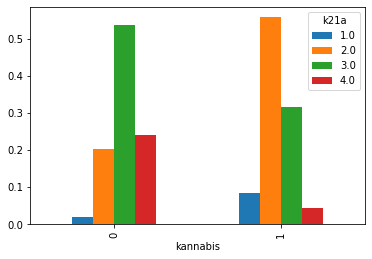

In [19]:
#  k21 Do you think drugs are a problem
# 1-4
#•	Not at all
#•	Minor problem
#•	Moderate problem
#•	Big problem


print(df['k21a'].value_counts(dropna= False)) # in your country
#df['k21a'].fillna((df['k21a'].median()), inplace=True)



print('\n --------------------------------- \n')

print(df['k21b'].value_counts(dropna= False)) #  in your area of residence?

df#['k21b'].fillna((df['k21b'].median()), inplace=True)



#pd.crosstab([df['k21a'].fillna('missing'), df['k21a'].fillna('missing')],df['kannabis'].fillna('missing'),margins=True)

pd.crosstab(df.kannabis, df.k21a,  normalize='index').plot.bar() # stacked=True



In [20]:
# k22  Health riks 
# Ei lainkaan riskiä
# Vähäinen  riski
# Kohtalainen riski
# Suuri riski

# How much health or other risk do you think there is if people do the following?
 # a)	Smoke one or more packs of cigarettes a day
 # b)	Drink themselves drunk at least once a week.
 # c)	Try cannabis once or twice
 # d)	Smoke cannabis regularly.
 # e)	Try ecstasy once or twice
 # f)	Use ecstasy regularly.
 
 # g) Try amphetamine once or twice
 # h) Use amphetamine regularly
 # i) Try heroin once or twice
 # j) Use heroin regularly
 # k) Try anabolic steroids once or twice.
 # l) Use anabolic steroids regularly

df[['k22a', 'k22b', 'k22c', 'k22d', 'k22e', 'k22f', 'k22g', 'k22h', 'k22i', 'k22j', 'k22k', 'k22l']].apply(pd.Series.value_counts)

,k22a,k22b,k22c,k22d,k22e,k22f,k22g,k22h,k22i,k22j,k22k,k22l
1.0,21,37,582,55,101,10,66,10,33,9,101,13
2.0,199,475,1205,412,557,42,367,17,167,8,722,43
3.0,963,1565,857,880,1156,338,982,163,714,54,1288,521
4.0,2278,1367,797,2097,1628,3048,2023,3254,2528,3350,1325,2862


In [21]:
# processing health risks

# sum all risk
general_list = ['k22a', 'k22b', 'k22c', 'k22d', 'k22e', 'k22f', 'k22g', 'k22h', 'k22i', 'k22j', 'k22k', 'k22l']
df["overall_health_risk"] = df[general_list].sum(axis=1)


# risk of use
risk_list = ["k22a", "k22b", "k22d", "k22f", "k22h", "k22j"]
df["risk_of_use"] = df[risk_list].sum(axis=1)



# risk of try
try_list = ["k22c", "k22e", "k22g", "k22i"]
df['risk_of_try'] = df[try_list].sum(axis=1)



In [22]:
# fill missing
#df[["overall_health_risk", "risk_of_try", "risk_of_use"]]=df[["overall_health_risk", "risk_of_try", "risk_of_use"]].fillna(value=df[["overall_health_risk", "risk_of_try", "risk_of_use"]].median())

print(df['overall_health_risk'].value_counts(dropna= False))

print(df['risk_of_try'].value_counts(dropna= False))

print(df['risk_of_use'].value_counts(dropna= False))



48.0    340
46.0    310
45.0    299
43.0    291
42.0    276
44.0    261
47.0    254
41.0    240
40.0    201
39.0    178
38.0    156
37.0    138
36.0    107
35.0     98
34.0     72
33.0     52
32.0     46
31.0     37
30.0     22
29.0     18
28.0     17
0.0      16
27.0      8
25.0      8
12.0      5
24.0      5
26.0      3
4.0       3
19.0      3
10.0      2
2.0       2
17.0      2
18.0      2
9.0       2
22.0      1
14.0      1
8.0       1
13.0      1
21.0      1
16.0      1
23.0      1
7.0       1
11.0      1
5.0       1
1.0       1
Name: overall_health_risk, dtype: int64
16.0    716
14.0    520
12.0    482
15.0    438
13.0    370
11.0    265
10.0    212
8.0     163
9.0     154
7.0      53
6.0      35
4.0      31
0.0      28
5.0      13
3.0       2
1.0       2
2.0       1
Name: risk_of_try, dtype: int64
24.0    887
23.0    821
22.0    643
21.0    428
20.0    279
19.0    178
18.0     99
17.0     45
16.0     26
0.0      16
15.0     14
14.0      9
13.0      8
6.0       6
12.0      6
8.0 

This might be a little bit tricky for you but mainly what I did here is that I first separeted variables into two groups, perceived risks of using drugs and perceiived risks of trying/experimenting drugs. Because people may think that experimenting might be less harmfull compared to regular use. 

In the second stage, I aggregated scores since there are too many variables here. I previously tested its validity with Cronbach alpha test whether this grouping is statistically meaninfull and valid. So, the higher the score on any item, the higher the perceived risk. I also created one variable just in case for any reason. 

In [23]:
# k23 Punishment for drugs 
# Do you think the following acts should be punished or not? Y/N
# a) Smoking cannabis .
# b) Mixed use of alcohol and medicines
# c) Purchasing medicines from the street trade
# d) Growing cannabis plants 
# e) Picking of mushroom-containing mushrooms 
# f) Use of heroin to relieve withdrawal symptoms
# g) Mailing cocaine 

print(df[['k23a', 'k23b', 'k23c', 'k23d', 'k23e', 'k23f','k23g']].apply(pd.Series.value_counts))

print('\n -------------------- \n')

print(df[['k23a', 'k23b', 'k23c', 'k23d', 'k23e', 'k23f','k23g']].apply(pd.Series.isnull).sum())

#df[["k23a", "k23b", "k23c", "k23d",  "k23e", "k23f", "k23g"]]=df[["k23a", "k23b", "k23c", "k23d", "k23e", "k23f", "k23g"]].fillna(value=df[["k23a", "k23b", "k23c", "k23d", "k23e", "k23f", "k23g"]].median())

#print('----------------\n')
#print(df[['k23a', 'k23b', 'k23c', 'k23d', 'k23e', 'k23f','k23g']].apply(pd.Series.isnull).sum())




     k23a  k23b  k23c  k23d  k23e  k23f  k23g
1.0  1487  1514   549   854  1756   927   108
2.0  1940  1893  2885  2572  1654  2484  3314

 -------------------- 

k23a    58
k23b    78
k23c    51
k23d    59
k23e    75
k23f    74
k23g    63
dtype: int64


In [24]:
#  ---- k26 If drug use were not illegal, 
# would you be interested in trying or using
# 1-4, 1 
# 1 = Yes, to use
# 2 = Yes, give it a try
# 3 = I don't
# 4 I do not say, ---  dikkat et

# a)	hashish or marijuana? 
# b)	ecstasy?
# c)	heroin

print(df[['k26a', 'k26b', 'k26c']].apply(pd.Series.value_counts))


# processing k26a
# if the option is 1 or 2 = 1 else = 0
    
df["cannabis_decr"] = np.where(df['k26a'] == 1, 1, 
                 (np.where(df['k26a'] == 2, 1, 0)))


print('\n --------------------\n ')

print(df['cannabis_decr'].value_counts(dropna= False))


     k26a  k26b  k26c
1.0   139    17     2
2.0   445   129    24
3.0  2688  3217  3378
4.0   187    89    47

 --------------------
 
0    2901
1     584
Name: cannabis_decr, dtype: int64


I interested in only cannabis.

In [25]:
# K27 Do you personally know people who use drugs?
# dummy 
# 1 = yes 2 = no

print(df['k27'].value_counts(dropna= False))

pd.crosstab(df['k27'].fillna('missing'), df['kannabis12'].fillna('missing'),margins=True)

df['drug_user_friend'] = np.where(df['k27']== 1, 1, 0)

#pd.crosstab(df.kannabis, df.k27).plot.bar()

print(df['drug_user_friend'].value_counts(dropna= False))


2.0    2091
1.0    1366
NaN      28
Name: k27, dtype: int64
0    2119
1    1366
Name: drug_user_friend, dtype: int64


In [26]:
################# k28 offered a drug ################### 
# Have you been offered a drug, either for free or for purchase?
# 1 = yes 2 = no


print(df['k28'].value_counts(dropna= False))

df['drug_offer'] = np.where(df['k28']== 1, 1, 0)

print(df['drug_offer'].value_counts(dropna= False))





2.0    2208
1.0    1251
NaN      26
Name: k28, dtype: int64
0    2234
1    1251
Name: drug_offer, dtype: int64


In [27]:
#####################  k29 drug offers  ################
# k29 -  How many times in the last 12 months have you been offered a drug in Finland
# 1-5, 1 lowest =1

# No 	1–2 		3–5 		6–9 	or 10  times more


print(df[['k29a', 'k29b']].apply(pd.Series.value_counts))

# olmaz bu, yukaridaki yeterli 
#df['free_offer'] = np.where(df['k29a'] > 1, 1, 0)
#df['purchase_offer'] = np.where(df['k29b'] > 1, 1, 0)

# fill na cok 
#df[["k29a", "k29b"]]=df[["k29a", "k29b"]].fillna(value=df[["k29a", "k29b"]].median())

#print('------------------\n', df[['free_offer', 'purchase_offer']].apply(pd.Series.value_counts)


print('\n --------- \n', df['k29a'].value_counts(dropna= False))
print('\n --------- \n', df['k29b'].value_counts(dropna= False))






     k29a  k29b
1.0  1001  1164
2.0   272   155
3.0    63    37
4.0    34    18
5.0    54    42

 --------- 
 NaN    2061
1.0    1001
2.0     272
3.0      63
5.0      54
4.0      34
Name: k29a, dtype: int64

 --------- 
 NaN    2069
1.0    1164
2.0     155
5.0      42
3.0      37
4.0      18
Name: k29b, dtype: int64


In [28]:
# k 30 --  Imagine that you would like to acquire the following substances. 

# a) cannabis?
# b) another drug?
# c) doping substances?

# How difficult or easy would it be for you to get it within 24 hours
# 1= Impossible
# 2 = pretty hard
# 3 =	Quite easy
# 4 = Very easy
# 5 = I can not say

print(df[['k30a', 'k30b', 'k30c']].apply(pd.Series.value_counts))

df['cannabis_access'] = df['k30a'].replace({5:0, 4:1, 3:2, 2:3, 1:4})
df['other_access'] = df['k30b'].replace({5:0, 4:1, 3:2, 2:3, 1:4})
df['doping_access'] = df['k30c'].replace({5:0, 4:1, 3:2, 2:3, 1:4})



print(df[['cannabis_access', 'other_access', 'doping_access']].apply(pd.Series.value_counts))

#df[['cannabis_access', 'other_access', 'doping_access']]=df[['cannabis_access', 'other_access', 'doping_access']].fillna(value=df[['cannabis_access', 'other_access', 'doping_access']].median())




     k30a  k30b  k30c
1.0   631   823   931
2.0   631   748   690
3.0   642   437   269
4.0   440   159   104
5.0  1104  1276  1435
     cannabis_access  other_access  doping_access
0.0             1104          1276           1435
1.0              440           159            104
2.0              642           437            269
3.0              631           748            690
4.0              631           823            931


In [29]:
# k64 - What do you think about the following?
# 1-5 
# Completely agree
#	Roughly the samef
#	Hard to say
#	Somewhat disagree
#	Completely disagree

# a) Drugs may also be used in a reasonable and non-problematic manner.
# b) The use of marijuana and hashish should be allowed. .
# c) Doping substances may also be used in a reasonable manner which does not cause problems ...
# d) The use of doping should be regulated by law in Finland


print(df[['k64a', 'k64b', 'k64c', 'k64d']].apply(pd.Series.value_counts))
#df[['k64a', 'k64b', 'k64c', 'k64d']].apply(pd.Series.value_counts).isnull().sum()



     k64a  k64b  k64c  k64d
1.0   238   260    44  1136
2.0   370   384   206   709
3.0   379   332   603   736
4.0   639   424   724   335
5.0  1824  2041  1857   518


In [30]:
# k65 subjected to violence ############
# Are you afraid of being subjected to violence due to other people's drug use?
# 1 Yes 
# 2 No
# 3 hard to say

print(df['k65'].value_counts())

df['violence_treat'] = np.where(df['k65']== 1, 1, 0)

print(df['violence_treat'].value_counts(dropna= False))

2.0    1471
1.0    1002
3.0     972
Name: k65, dtype: int64
0    2483
1    1002
Name: violence_treat, dtype: int64


In [31]:
########### k66 Alcohol vs Drugs ##########
# Alcohol vs Drugs 
# 66 - which one is more problematic alcohol or drugs
# 1- Clearly more than alcohol 
# 2- Slightly more than alcohol 
# 3- Equal to both 
# 4- A little more about drugs 
# 5- Clearly more about drugs

print(df['k66'].value_counts(dropna= False))

#df['k66'].fillna((df['k66']).median(), inplace=True)

#print('---------------------\n', df['k66'].value_counts(dropna= False))





1.0    1347
3.0     860
2.0     760
5.0     256
4.0     224
NaN      38
Name: k66, dtype: int64


In [32]:

##########  k68 current state of health? #########
# 68 - What do you think about your current state of health?
# 1- Very good 
# 2- Pretty good 
# 3- Moderate 
# 4- Quite bad 
# 5- Very bad 

print(df['k68'].value_counts(dropna= False))

#df['k68'].fillna((df['k68']).median(), inplace=True)

#print('---------------- \n' ,df['k68'].value_counts(dropna= False))





2.0    1663
1.0    1079
3.0     599
4.0      97
NaN      39
5.0       8
Name: k68, dtype: int64


In [33]:
# categoric

# ------ k70 ---------------
# Have you had any health problems that you believe have been caused by:
#1.	Yes, in the last 12 months
#2.	Yes, but not in the last 12 months
#3.	Never
#4.	I do not use that substance

 # a)	your use of alcohol?
 # b)	your drug use ?.
 # c)	your use of sedatives, hypnotics or painkillers ?. 
 # d)  the simultaneous use of different substances?
 # e)	your use of doping substances?


print(df[['k70a', 'k70b', 'k70c', 'k70d', 'k70e']].apply(pd.Series.value_counts))
df[['k70a', 'k70b', 'k70c', 'k70d', 'k70e']].apply(pd.Series.value_counts).isnull().sum()


#df[['k70a', 'k70b', 'k70c', 'k70d', 'k70e']]=df[['k70a', 'k70b', 'k70c', 'k70d', 'k70e']].fillna(value=df[['k70a', 'k70b', 'k70c', 'k70d', 'k70e']].median())


#print('--------- \n', df[['k70a', 'k70b', 'k70c', 'k70d', 'k70e']].apply(pd.Series.value_counts))




     k70a  k70b  k70c  k70d    k70e
1.0   118    14    43    10     3.0
2.0   194    33    68    35     NaN
3.0  2689  1181  1531  1340  1020.0
4.0   434  2160  1759  2016  2370.0


k70a    0
k70b    0
k70c    0
k70d    0
k70e    1
dtype: int64

In [34]:
# numeric

# ---  k72 -----------
# How many times a week do you do sports or exercise?# 1- Very good 
# 1	I don't exercise ....
# 2	Less than once a week
# 3	1-2 times a week
# 4	3-4 times a week
# 5	5-7 times a week
# 6 times a week or more


print(df['k72'].value_counts(dropna= False))

df['k72'].fillna((df['k72']).median(), inplace=True)

print('--------------\n', df['k72'].value_counts(dropna= False))






4.0    1146
3.0    1058
5.0     579
2.0     416
1.0     163
6.0      95
NaN      28
Name: k72, dtype: int64
--------------
 4.0    1174
3.0    1058
5.0     579
2.0     416
1.0     163
6.0      95
Name: k72, dtype: int64


In [35]:
# --- k76 -----
# Have you been unemployed in the last 12 months?
# 1 I have not been unemployed 
# 2 I've been unemployed for a total of ________ months

print(df['k76'].value_counts())


# null marked as unumployed 
df['employment'] = np.where(df['k76'] ==1, 1, 0)

print(df['employment'].value_counts())





1.0    2666
2.0     586
Name: k76, dtype: int64
1    2666
0     819
Name: employment, dtype: int64


# Data Processing 

In [36]:
binary_list = ['k1', 'e_cigarette', 'k6', 'non_medicide', 'k23a', 'k23b', 'k23c', 'k23d', 'k23e', 
'k23f','k23g', 'drug_user_friend', 'drug_offer', 'violence_treat', 'employment']


categoric_list = ['age_bins', 'k3', 'k4', 'k5', 'k7', 'k70a','k70b', 'k70c', 'k70d', 'k70e' ]

numeric_list = ['k9', 'k12','alcohol_use', 'k21a', 'k21b', 'risk_of_use', 'risk_of_try', 
'cannabis_access', 'other_access', 'doping_access', 'k66', 'k68', 'k72' ]

In [37]:
df[binary_list].isnull().sum()



k1                    0
e_cigarette           0
k6                  129
non_medicide          0
k23a                 58
k23b                 78
k23c                 51
k23d                 59
k23e                 75
k23f                 74
k23g                 63
drug_user_friend      0
drug_offer            0
violence_treat        0
employment            0
dtype: int64

In [38]:
df[categoric_list].isnull().sum()

age_bins      0
k3           21
k4           29
k5           96
k7          107
k70a         50
k70b         97
k70c         84
k70d         84
k70e         92
dtype: int64

In [39]:
df[numeric_list].describe().T

,count,mean,std,min,25%,50%,75%,max
k9,3481.0,3.964091,1.355545,1.0,4.0,4.0,5.0,5.0
k12,3461.0,4.802369,0.585178,1.0,5.0,5.0,5.0,5.0
alcohol_use,3190.0,4.850157,1.973196,1.0,3.0,5.0,6.0,9.0
k21a,3446.0,2.952699,0.740942,1.0,2.0,3.0,3.0,4.0
k21b,3360.0,2.138690,0.848333,1.0,2.0,2.0,3.0,4.0
risk_of_use,3485.0,21.782783,2.815539,0.0,21.0,22.0,24.0,24.0
risk_of_try,3485.0,12.741750,2.972297,0.0,11.0,13.0,15.0,16.0
cannabis_access,3448.0,1.781032,1.508671,0.0,0.0,2.0,3.0,4.0
other_access,3443.0,1.907929,1.641435,0.0,0.0,2.0,3.0,4.0
doping_access,3429.0,1.876932,1.725475,0.0,0.0,2.0,4.0,4.0


## Recoded data

In [40]:
target = ['kannabis']
new_data = target+numeric_list + binary_list + categoric_list

data= df[new_data]
data.head().T

,0,1,2,3,4
kannabis,0,0,0,0,0
k9,4.0,3.0,5.0,3.0,3.0
k12,4.0,3.0,5.0,5.0,5.0
alcohol_use,7.0,6.0,7.0,6.0,6.0
k21a,2.0,3.0,3.0,2.0,2.0
k21b,1.0,3.0,2.0,1.0,3.0
risk_of_use,20.0,22.0,21.0,22.0,21.0
risk_of_try,13.0,14.0,13.0,11.0,12.0
cannabis_access,2.0,1.0,2.0,3.0,1.0
other_access,2.0,1.0,3.0,3.0,3.0


### Dummy

In [41]:
data = pd.get_dummies(data, columns = binary_list, drop_first=True) 
data= pd.get_dummies(data, columns= categoric_list, drop_first=True)
data.head().T

,0,1,2,3,4
kannabis,0.0,0.0,0.0,0.0,0.0
k9,4.0,3.0,5.0,3.0,3.0
k12,4.0,3.0,5.0,5.0,5.0
alcohol_use,7.0,6.0,7.0,6.0,6.0
k21a,2.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...
k70d_2.0,0.0,0.0,0.0,0.0,0.0
k70d_3.0,0.0,0.0,0.0,0.0,0.0
k70d_4.0,1.0,1.0,1.0,1.0,1.0
k70e_3.0,0.0,0.0,0.0,0.0,0.0


## Impute missing values

In [42]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(data.values)
imputed_data = imr.transform(data.values)
imputed_data

array([[0., 4., 4., ..., 1., 0., 1.],
       [0., 3., 3., ..., 1., 0., 1.],
       [0., 5., 5., ..., 1., 0., 1.],
       ...,
       [0., 5., 5., ..., 0., 1., 0.],
       [0., 5., 5., ..., 0., 1., 0.],
       [0., 5., 5., ..., 1., 0., 1.]])

In [43]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt

savetxt('thl_array.csv', imputed_data, delimiter=',')

#### Impute missing and out as dataframe

In [44]:
# impute missing values via the column mean

from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.NaN, strategy='median')
imputed_data=pd.DataFrame(imp.fit_transform(data))
imputed_data.columns=data.columns
imputed_data.index=data.index

In [45]:
imputed_data.head()

,kannabis,k9,k12,alcohol_use,k21a,k21b,risk_of_use,risk_of_try,cannabis_access,other_access,...,k70b_3.0,k70b_4.0,k70c_2.0,k70c_3.0,k70c_4.0,k70d_2.0,k70d_3.0,k70d_4.0,k70e_3.0,k70e_4.0
0,0.0,4.0,4.0,7.0,2.0,1.0,20.0,13.0,2.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.0,3.0,3.0,6.0,3.0,3.0,22.0,14.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,5.0,5.0,7.0,3.0,2.0,21.0,13.0,2.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,3.0,5.0,6.0,2.0,1.0,22.0,11.0,3.0,3.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,3.0,5.0,6.0,2.0,3.0,21.0,12.0,1.0,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [46]:
imputed_data.to_csv('thl_recoded.csv', index=False)

### Correlation plot

<AxesSubplot:>

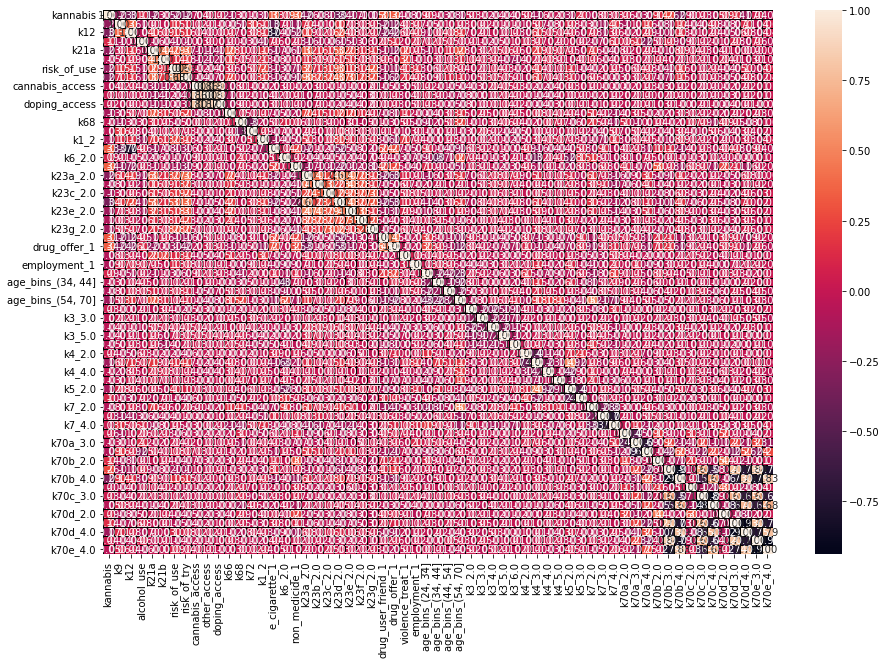

In [47]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(imputed_data.corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

Since we have too many variables, graph is not helpfull to find out correlated variables. Then we can create a list to analyse the correlated variables. 

In [49]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(imputed_data, 15))

Top Absolute Correlations
k70e_3.0         k70e_4.0         0.937839
k70d_3.0         k70d_4.0         0.925919
k70b_3.0         k70b_4.0         0.914119
k70c_3.0         k70c_4.0         0.893589
other_access     doping_access    0.871960
cannabis_access  other_access     0.857731
k70b_3.0         k70e_3.0         0.841187
k70b_4.0         k70e_4.0         0.832668
cannabis_access  doping_access    0.800422
k70b_3.0         k70e_4.0         0.794276
k70b_4.0         k70e_3.0         0.794034
                 k70d_4.0         0.789436
k70d_3.0         k70e_3.0         0.787939
k70d_4.0         k70e_4.0         0.786081
k70b_3.0         k70d_3.0         0.771242
dtype: float64


It seems that responses of two categorical variables are correlated but this this an expected situation since they are the part of the same questions. 